In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm
from Coeffs import *
import itertools
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

# $ u \bar{u}\to t \bar{t}$, $|\mathcal{M}|^2 \propto g_s^4 $ 

In [2]:
#data
eft_u1_cs = [(17.69,0.01753), (17.69,0.01726), (17.71,0.0186), (17.71,0.01186), 
             (17.71,0.01978), (17.7,0.02013), (17.74,0.02001), (17.7,0.01107),
            (17.72,0.01783), (17.67,0.02003)] #pn

uv_u1_cs = [(1.782e+01,4.8e-2), (1.770e+01,4.8e-2), (1.77e1,4.8e-2), (1.762e1,3.4e-2),
            (1.773e1,4.9e-2), (1.77e1,4.8e-2), (1.767e1,4.8e-2), (1.769e1,4.9e-2),
           (1.767e1,4.8e-2), (1.770e1,4.8e-2)] #pb

m_SDM1 = [9.9, 19.9, 29.9, 39.9, 49.9, 59.9, 69.9, 79.9, 89.9, 99.9] #TeV

m_psiT1 = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0] #TeV

In [3]:
#Getting the points
pts_u1_eft = []
err_u1_eft = []
pts_u1_uv = []
err_u1_uv = []
for i,cs in enumerate(eft_u1_cs):
    pts_u1_eft.append(cs[0])
    err_u1_eft.append(cs[1])
    pts_u1_uv.append(uv_u1_cs[i][0])
    err_u1_uv.append(uv_u1_cs[i][1])

pts_u1_eft = np.array(pts_u1_eft)
err_u1_eft = np.array(err_u1_eft)
pts_u1_uv = np.array(pts_u1_uv)
err_u1_uv = np.array(err_u1_uv)

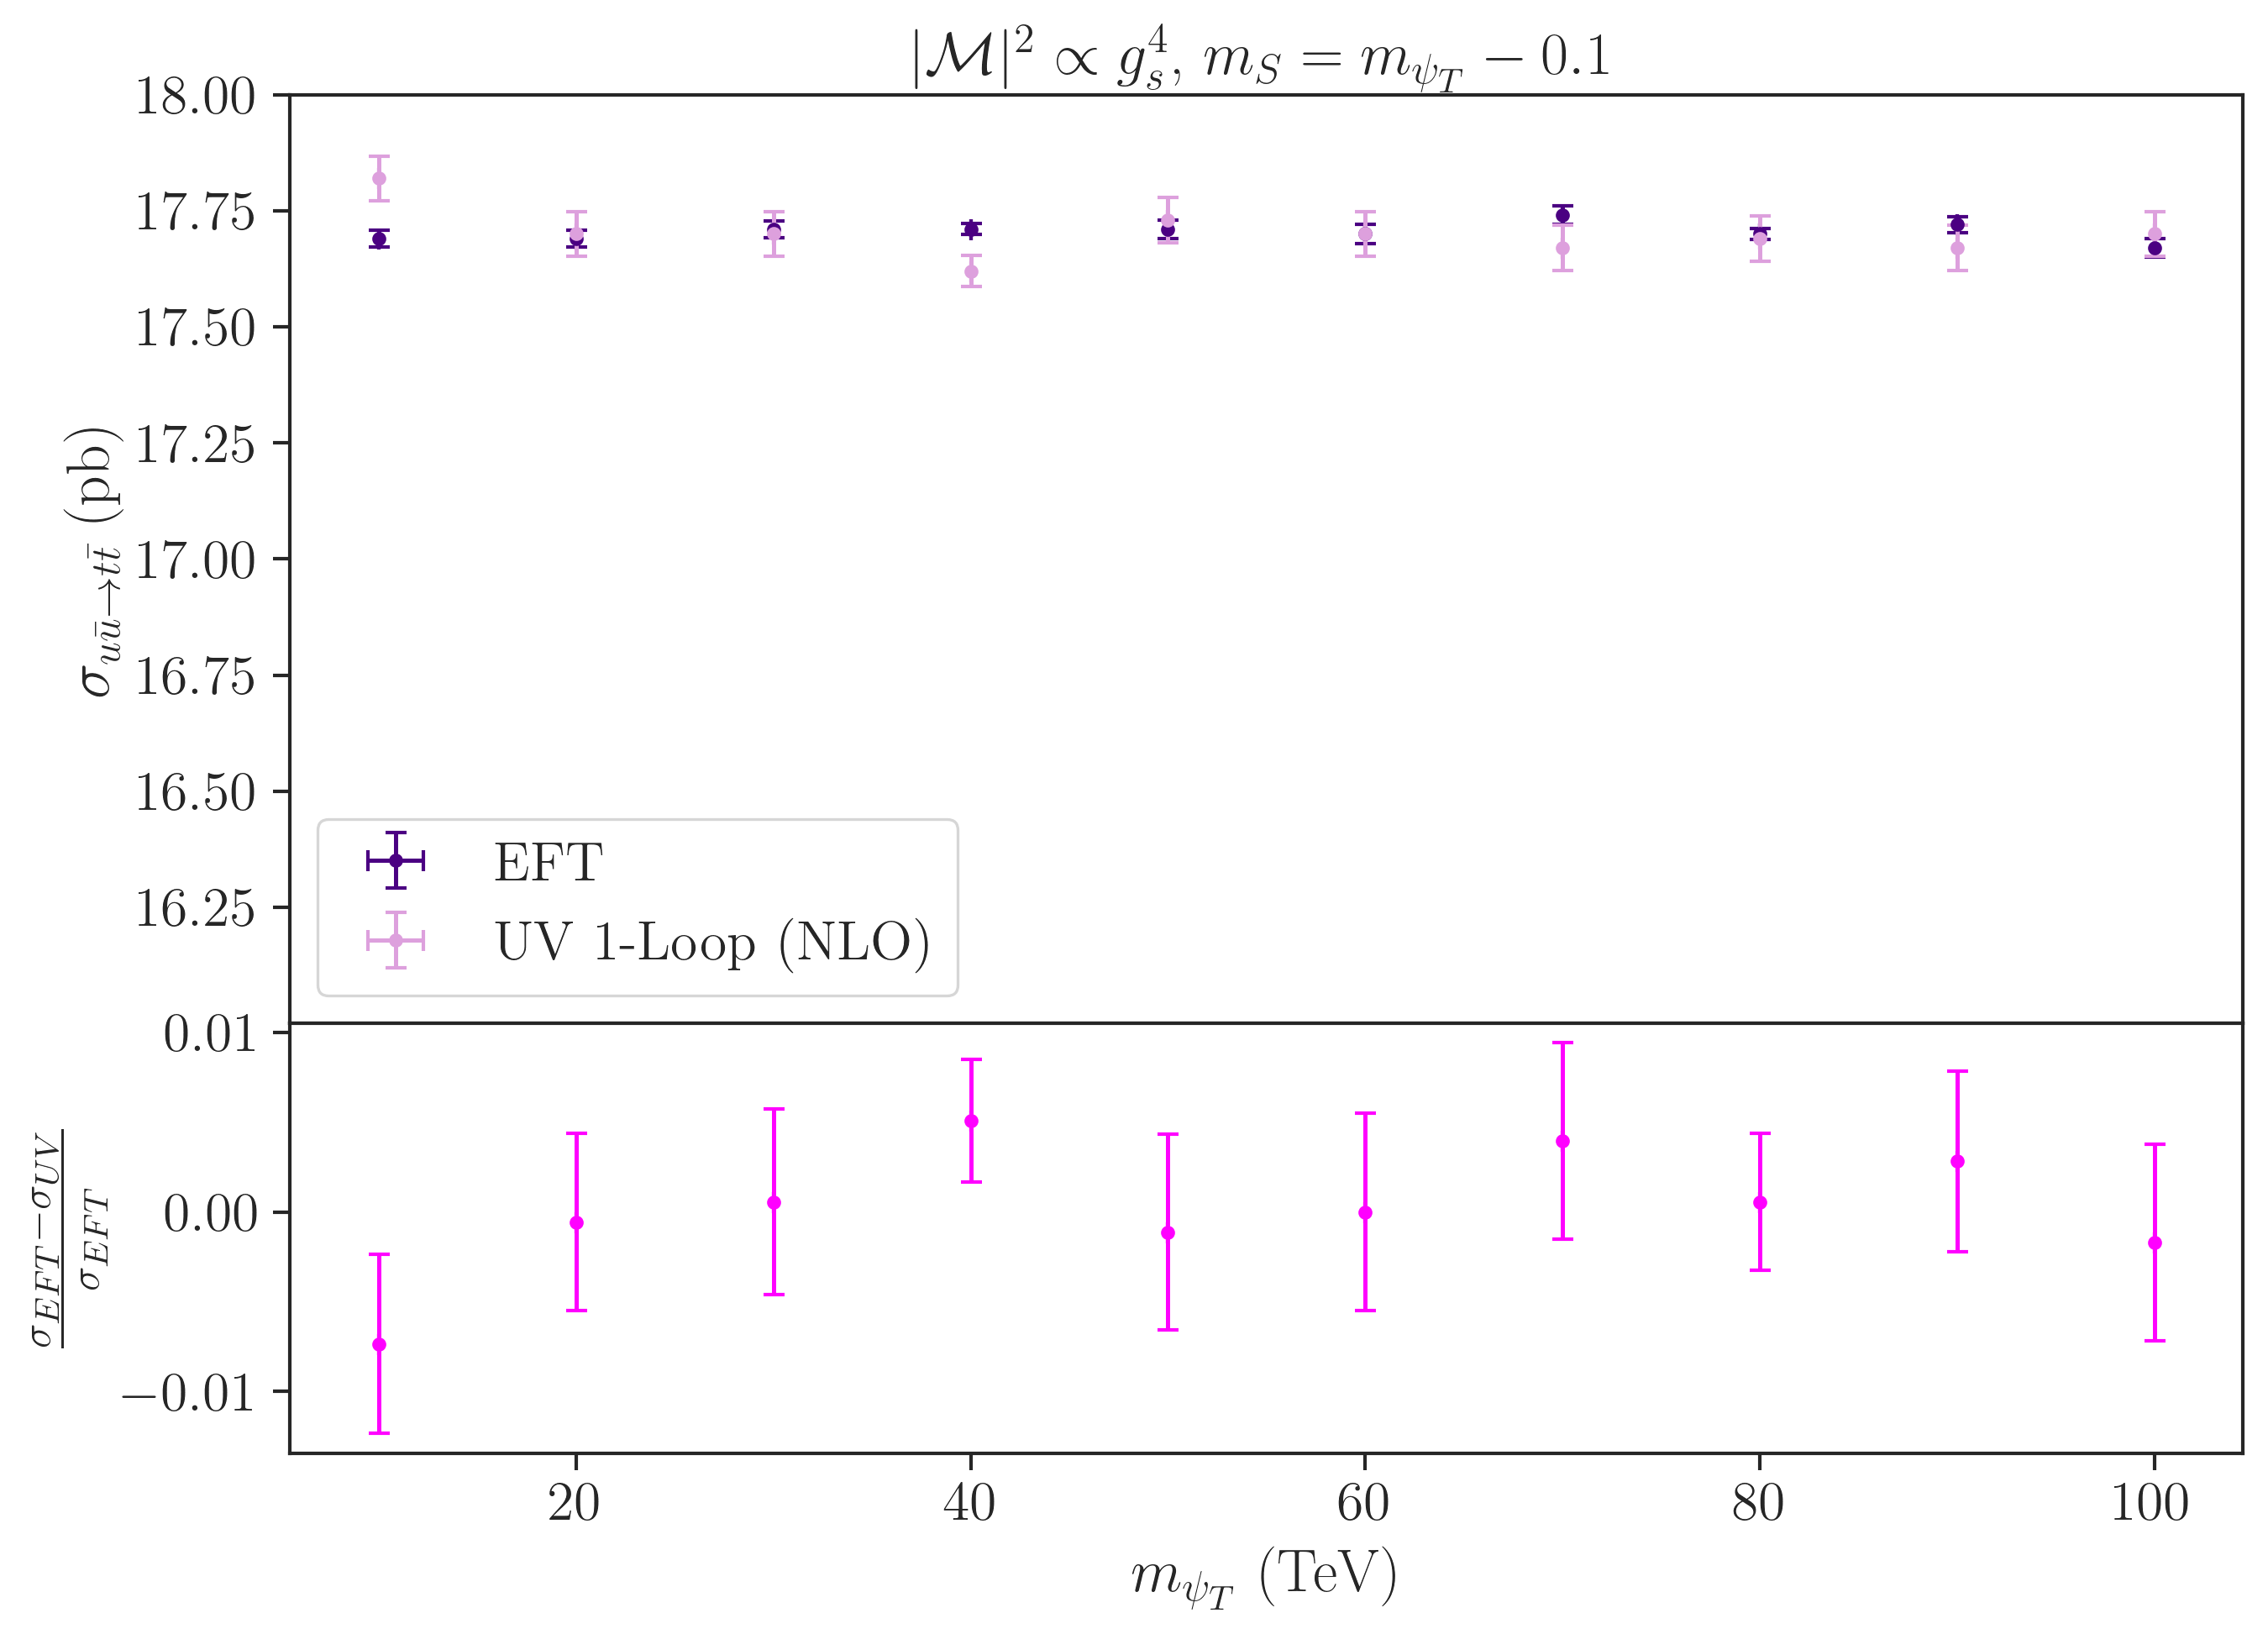

In [4]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 3.7])
axs = gs.subplots(sharex=True)

#Gráfico principal
axs[0].errorbar(m_psiT1,pts_u1_eft,err_u1_eft,0, 'o', ms = 3.0, capsize=3, 
                color = 'indigo', label = 'EFT' )
axs[0].errorbar(m_psiT1,pts_u1_uv,err_u1_uv,0, 'o', ms = 3.0, capsize=3, 
                color = 'plum', label = 'UV 1-Loop (NLO)' )
axs[0].set_ylabel(r'$\sigma_{u\bar{u}\to t\bar{t}}$ (pb)')
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}|^2 \propto g_s^4 $, $m_S = m_{\psi_T} - 0.1$  ')
axs[0].set_ylim([16,18])
axs[0].set_yticks(np.arange(16.25,18.1,0.25))
#axs[0].set_yscale('log')


#Gráfico de resíduos
diff1 = (pts_u1_eft - pts_u1_uv)/pts_u1_eft
err1 = np.sqrt((err_u1_uv/pts_u1_eft)**2 + (pts_u1_uv/(pts_u1_eft**2)) * err_u1_eft**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_psiT1,diff1,err1,0, 'o', ms = 3.0, capsize=3, 
                color = 'magenta', label = 'EFT - UV 1-Loop' )
#axs[1].axhline(y=10, color='k', linestyle='--')
#axs[1].axhline(y=-10, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT} - \sigma_{UV}}{\sigma_{EFT}}$')

#axs[1].set_yscale('log')


plt.xlabel(r'$m_{\psi_T}$ (TeV)')


plt.show()

# $ u \bar{u}\to t \bar{t}$, $|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$ 

In [5]:
#data

eft_u_cs = [(4.621e-5,3.0e-8), (1.152e-5,1.0e-8), (5.114e-6,6.0e-9), (4.497e-6,5.574e-9),
            (3.979e-6,3.835e-9), (3.552e-6,4.33e-9), (3.184e-6,3.446e-9), (2.877e-6,3.3e-9),
            (2.61e-6,2.755e-9), (2.378e-6,2.423e-9), (2.175e-6,2.39e-9), (1.997e-6,2.371e-9),
           (1.841e-6, 2.2e-9), (1.699e-6,2.055e-9), (1.577e-6,1.562e-9), (1.466e-6,1.95e-9),
            (1.366e-6,1.4e-9), (1.278e-6,1.1e-9), (1.196e-6,1.274e-9),(9.396e-7,9.4e-10), 
            (7.184e-7,8.5e-10), (5.679e-7,6.2e-10),(4.596e-7,5.5e-10)] #pb

uv_u_cs = [(4.614e-5,1.9e-7), (1.159e-5,6.7e-8), (5.000e-6, 4.6e-08), (4.190e-6,9.5e-8),
           (4.136e-6,6.0e-8), (3.082e-6,8.7e-8), (2.285e-6,1.2e-7), (3.102e-6,5.0e-8),
           (7.269e-7,5.9e-8), (3.811e-6,1.8e-7),(7.862e-7,5e-8), (-8.711e-7,5.7e-8),
          (-7.14e-7,4.1e-8), (2.262e-6,1.8e-7), (1.017e-5,5.1e-7), (1.816e-5,4.5e-7),
           (6.75e-6,3.0e-7), (2.338e-5, 8.1e-07), (-8.344e-6,3.2e-7), (-2.34e-5,9.0e-7), 
           (-4.07e-5, 1.3e-6), (3.479e-5,1.9e-6), (8.086e-6,4.0e-7)] #pb

m_SDM = [9.9, 19.9, 29.9, 31.9, 33.9, 35.9, 37.9, 39.9, 41.9, 43.9, 45.9, 47.9, 49.9, 51.9, 53.9, 
         55.9, 57.9, 59.9, 61.9, 69.9, 79.9, 89.9, 99.9] #TeV

m_psiT = [10.0, 20.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 
          56.0, 58.0, 60.0, 62.0, 70.0, 80.0, 90.0, 100.0] #TeV

In [6]:
#Getting the points
pts_u_eft = []
err_u_eft = []
pts_u_uv = []
err_u_uv = []
for i,cs in enumerate(eft_u_cs):
    pts_u_eft.append(cs[0])
    err_u_eft.append(cs[1])
    pts_u_uv.append(uv_u_cs[i][0])
    err_u_uv.append(uv_u_cs[i][1])

pts_u_eft = np.array(pts_u_eft)
err_u_eft = np.array(err_u_eft)
pts_u_uv = np.array(pts_u_uv)
err_u_uv = np.array(err_u_uv)

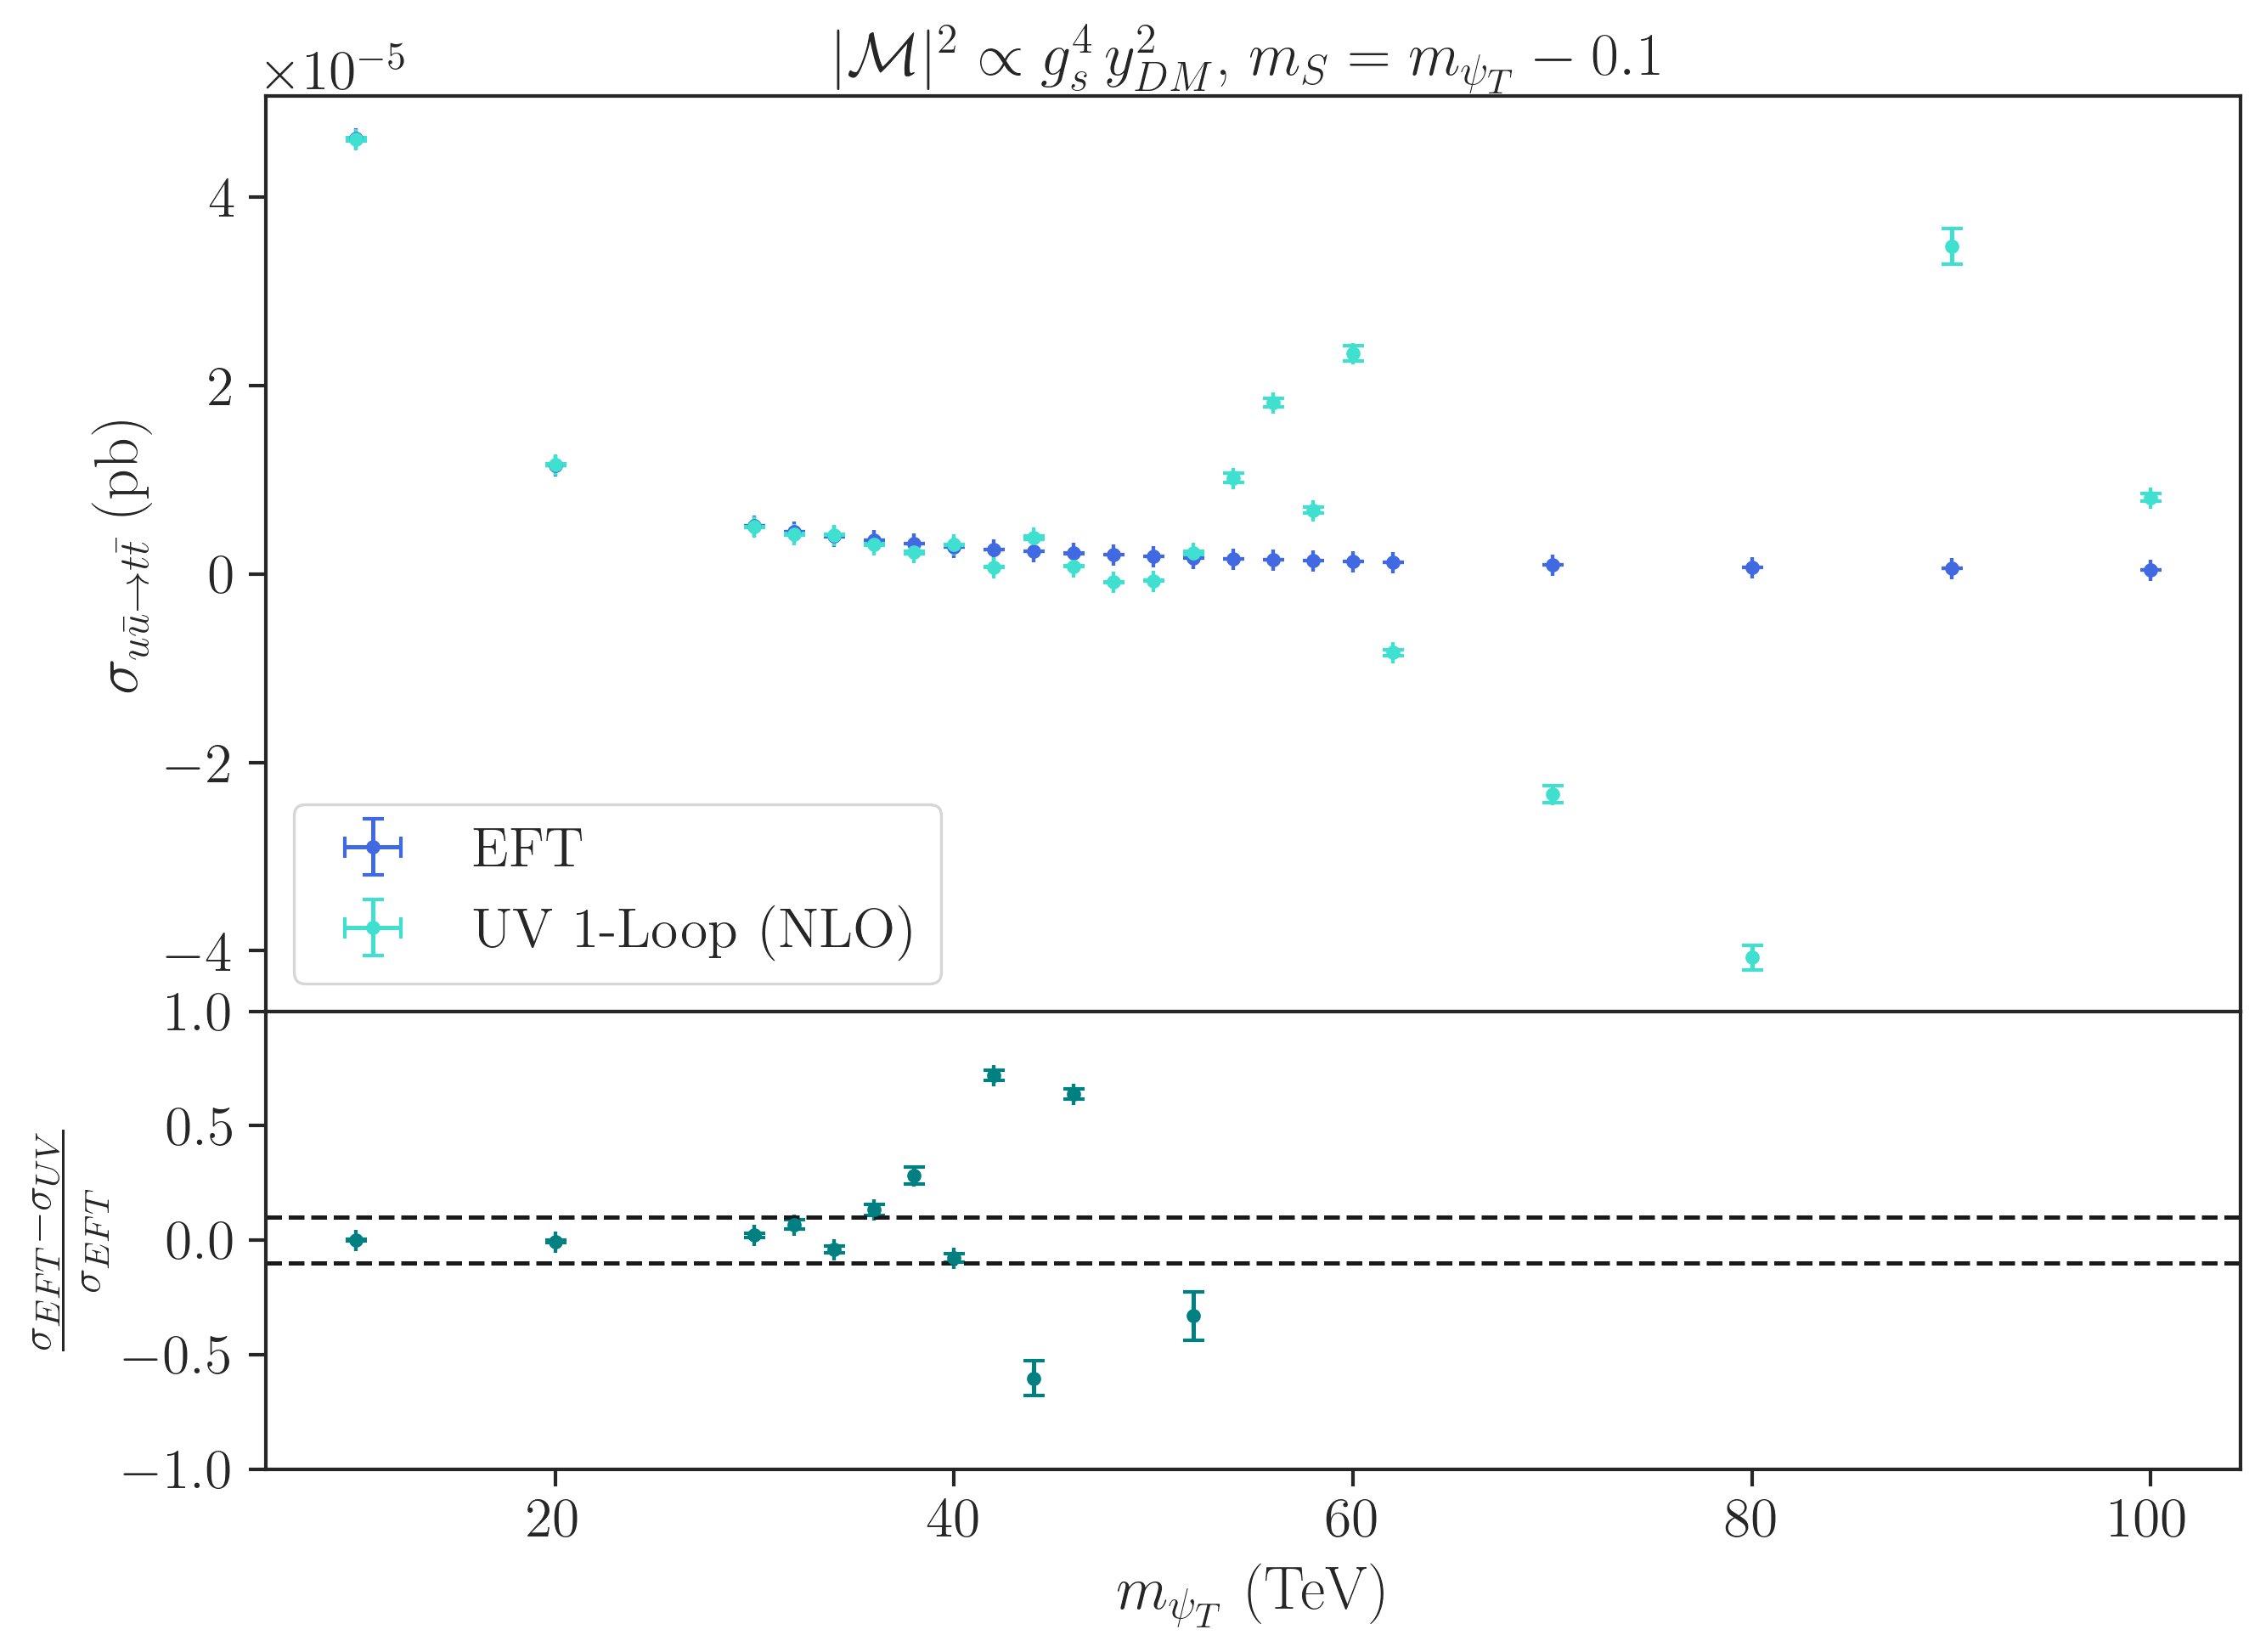

In [7]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 4])
axs = gs.subplots(sharex=True)

#Gráfico principal
axs[0].errorbar(m_psiT,pts_u_eft,err_u_eft, 0, 'o', ms = 3.0, capsize=3, 
                color = 'royalblue', label = 'EFT' )
axs[0].errorbar(m_psiT,pts_u_uv,err_u_uv,0, 'o', ms = 3.0, capsize=3, 
                color = 'Turquoise', label = 'UV 1-Loop (NLO)' )
axs[0].set_ylabel(r'$\sigma_{u\bar{u}\to t\bar{t}}$ (pb)')
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$, $m_S = m_{\psi_T} - 0.1$ ')
#axs[0].set_yscale('log')


#Gráfico de resíduos
diff = (pts_u_eft - pts_u_uv)/pts_u_eft
err = np.sqrt((err_u_uv/pts_u_eft)**2 + (pts_u_uv/(pts_u_eft**2)) * err_u_eft**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_psiT,diff,err,0, 'o', ms = 3.0, capsize=3, 
                color = 'teal', label = 'EFT - UV 1-Loop' )
axs[1].axhline(y=0.1, color='k', linestyle='--')
axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT} - \sigma_{UV}}{\sigma_{EFT}}$')
axs[1].set_ylim([-1,1])

#axs[1].set_yscale('log')


plt.xlabel(r'$m_{\psi_T}$ (TeV)')


plt.show()

## Investigating the impact of mass ratio variation 

In [8]:
eft_u2_cs = [(4.621e-5,3.0e-8), (4.869e-5,5.99e-8), (4.725e-5,4.872e-8), (4.805e-05,5.468e-08), 
             (4.935e-05,3.666e-8), (5.014e-5,6.139e-8), (5.082e-5,5.501e-8), (5.159e-5,6.213e-8)] 

uv_u2_cs = [(4.614e-5,1.9e-7), (4.7522e-5,3.5e-7), (4.698e-5,3.3e-7), (4.824e-05,3.0e-7),
            (4.49e-5,6.3e-7), (3.967e-5,8.6e-7), (1.506e-5,1.1e-6), (-3.931e-5,2.1e-06)]

m_SDM2 = np.array([9.9, 9.0, 9.5, 9.25, 8.75, 8.5, 8.25, 8.0]) 

m_psiT2 = np.array([10.0,10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0])

In [9]:
#Getting the points
pts_u2_eft = []
err_u2_eft = []
pts_u2_uv = []
err_u2_uv = []
for i,cs in enumerate(eft_u2_cs):
    pts_u2_eft.append(cs[0])
    err_u2_eft.append(cs[1])
    pts_u2_uv.append(uv_u2_cs[i][0])
    err_u2_uv.append(uv_u2_cs[i][1])

pts_u2_eft = np.array(pts_u2_eft)
err_u2_eft = np.array(err_u2_eft)
pts_u2_uv = np.array(pts_u2_uv)
err_u2_uv = np.array(err_u2_uv)

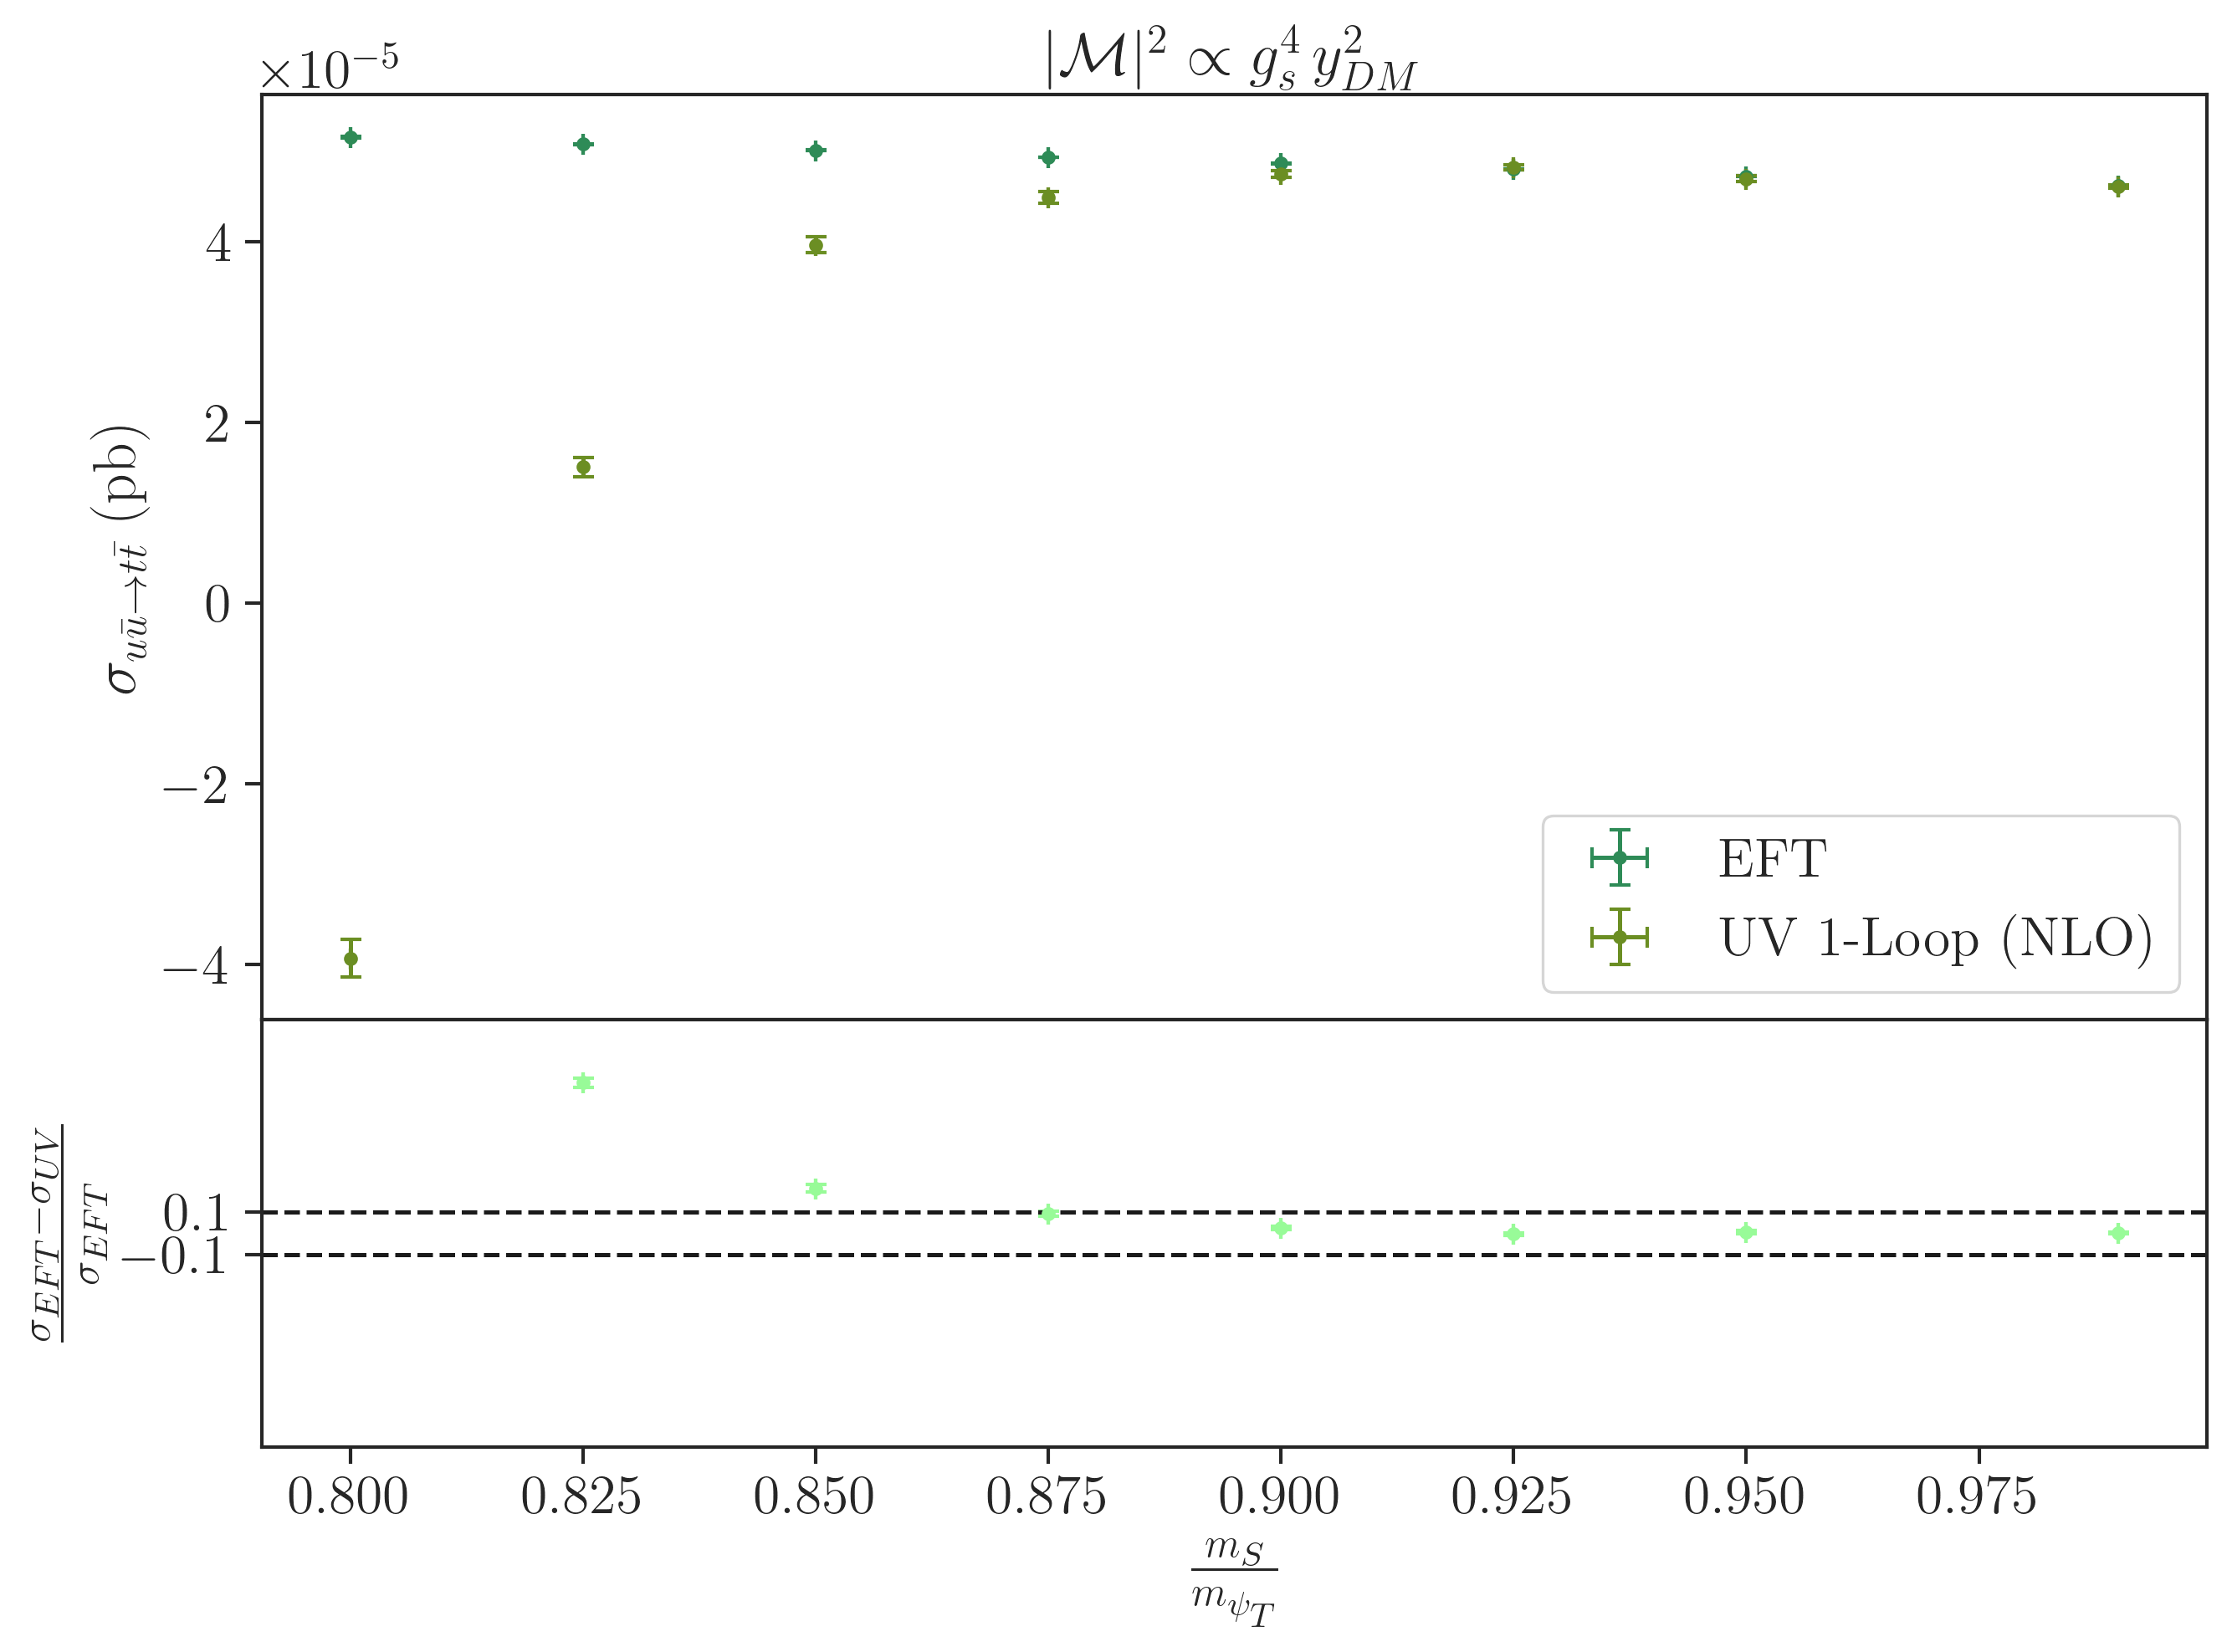

In [10]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 3.7])
axs = gs.subplots(sharex=True)

#Gráfico principal
axs[0].errorbar(m_SDM2/m_psiT2,pts_u2_eft,err_u2_eft, 0, 'o', ms = 3.0, capsize=3, 
                color = 'seagreen', label = 'EFT' )
axs[0].errorbar(m_SDM2/m_psiT2,pts_u2_uv,err_u2_uv,0, 'o', ms = 3.0, capsize=3, 
                color = 'olivedrab', label = 'UV 1-Loop (NLO)' )
axs[0].set_ylabel(r'$\sigma_{u\bar{u}\to t\bar{t}}$ (pb)')
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$')
#axs[0].set_yscale('log')


#Gráfico de resíduos
diff2 = (pts_u2_eft - pts_u2_uv)/pts_u2_eft
err2 = np.sqrt((err_u2_uv/pts_u2_eft)**2 + (pts_u2_uv/(pts_u2_eft**2)) * err_u2_eft**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_SDM2/m_psiT2,diff2,err2,0, 'o', ms = 3.0, capsize=3, 
                color = 'palegreen', label = 'EFT - UV 1-Loop' )
axs[1].axhline(y=0.1, color='k', linestyle='--')
axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT} - \sigma_{UV}}{\sigma_{EFT}}$')
axs[1].set_yticks([-0.1,0.1])
axs[1].set_ylim([-1,1])
#axs[1].set_yscale('log')


plt.xlabel(r'$\frac{m_S}{m_{\psi_T}}$')


plt.show()

# $ g g\to t \bar{t}$, $|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$ 

In [20]:
#data

eft_g_cs = [(1.754e-4,2.12e-07), (6.833e-5,9.436e-8), (4.368e-5,5.405e-8), (3.601e-5,4.283e-8), 
            (3.026e-5,3.798e-8), (2.579e-5,3.085e-8), (1.934e-5,2.01e-8), (1.344e-5,1.584e-8),
            (1.088e-5,1.384e-8), (8.226e-6,1.037e-8), (6.95e-6,6.701e-9)] #pb

uv_g_cs = [(1.775e-4,8.5e-7), (6.658e-5,3.8e-7), (4.127e-5,3.1e-7), (3.887e-05,3.1e-7), 
           (2.212e-5,5.9e-7), (5.371e-5,1.2e-6), (-4.25e-5,3.1e-6), (-1.749e-4,5e-6), 
           (8.691e-5,1.6e-6), (-3.589e-4,9.7e-6), (-5.581e-4,1.6e-5)] #pb 

m_SDM3 = [9.9, 15.9, 19.9, 21.9, 23.9, 25.9, 29.9, 35.9, 39.9, 45.9, 49.9] #TeV

m_psiT3 = [10.0, 16.9, 20.0, 22.0, 24.0, 26.0, 30.0, 36.0, 40.0, 46.0, 50.0] #TeV

In [21]:
#Getting the points
pts_g_eft = []
err_g_eft = []
pts_g_uv = []
err_g_uv = []
for i,cs in enumerate(eft_g_cs):
    pts_g_eft.append(cs[0])
    err_g_eft.append(cs[1])
    pts_g_uv.append(uv_g_cs[i][0])
    err_g_uv.append(uv_g_cs[i][1])

pts_g_eft = np.array(pts_g_eft)
err_g_eft = np.array(err_g_eft)
pts_g_uv = np.array(pts_g_uv)
err_g_uv = np.array(err_g_uv)

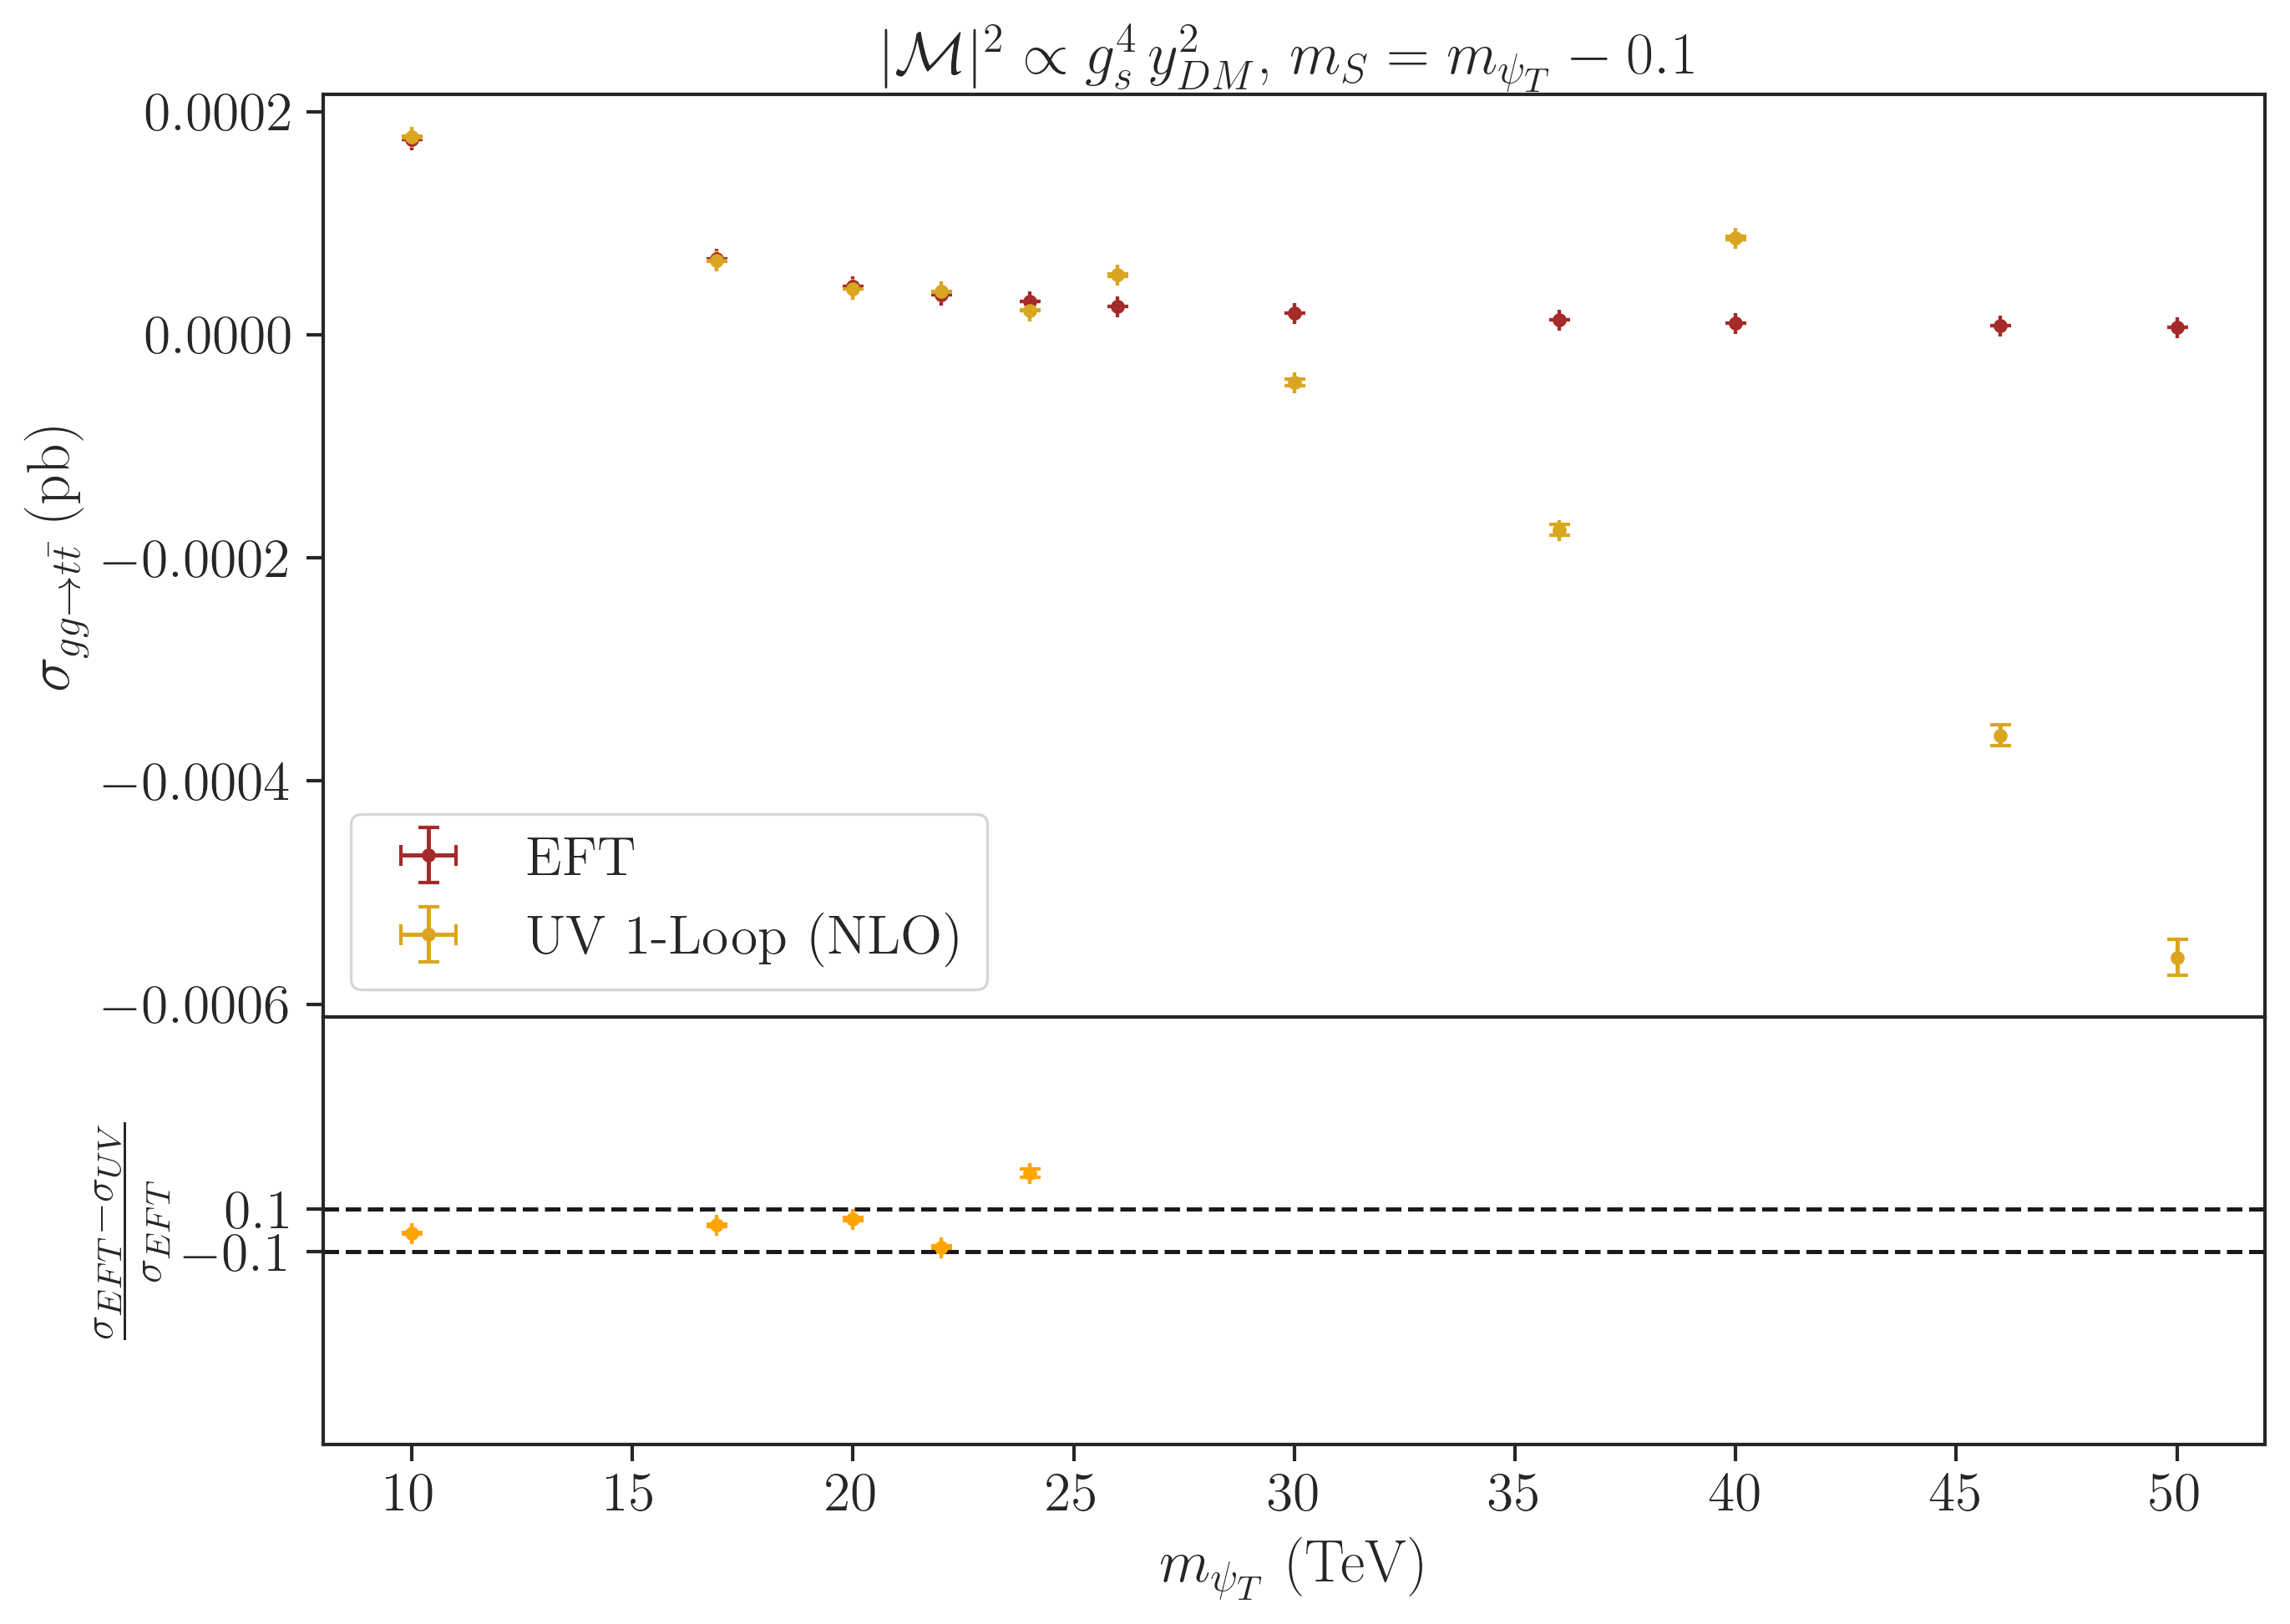

In [23]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 3.7])
axs = gs.subplots(sharex=True)

#Gráfico principal
axs[0].errorbar(m_psiT3,pts_g_eft,err_g_eft, 0, 'o', ms = 3.0, capsize=3, 
                color = 'brown', label = 'EFT' )
axs[0].errorbar(m_psiT3,pts_g_uv,err_g_uv,0, 'o', ms = 3.0, capsize=3, 
                color = 'goldenrod', label = 'UV 1-Loop (NLO)' )
axs[0].set_ylabel(r'$\sigma_{gg\to t\bar{t}}$ (pb)')
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$, $m_S = m_{\psi_T} - 0.1$  ')
#axs[0].set_yscale('log')


#Gráfico de resíduos
diff4 = (pts_g_eft - pts_g_uv)/pts_g_eft
err4 = np.sqrt((err_g_uv/pts_g_eft)**2 + (pts_g_uv/(pts_g_eft**2)) * err_g_eft**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_psiT3,diff4,err4,0, 'o', ms = 3.0, capsize=3, 
                color = 'orange', label = 'EFT - UV 1-Loop' )
axs[1].axhline(y=0.1, color='k', linestyle='--')
axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT} - \sigma_{UV}}{\sigma_{EFT}}$')
axs[1].set_yticks([-0.1,  0.1])
axs[1].set_ylim([-1,1])
#axs[1].set_yscale('log')


plt.xlabel(r'$m_{\psi_T}$ (TeV)')


plt.show()

In [49]:
eft_g1_cs = [(1.754e-4,2.12e-07), (1.809e-4,2.555e-7), (1.885e-4,2.519e-7), (1.925e-4,2.478e-7),
            (1.844e-4,1.353e-7), (1.7722e-4,2.218e-7), (1.964e-7,2.321e-7)] #pb

uv_g1_cs = [(1.775e-4,8.5e-7), (1.612e-4,2.9e-6), (4.489e-5,1.8e-6), (-1.853e-4,9.2e-6),
           (2.611e-4,5.5e-6), (1.745e-4,8.8e-7), (-5.866e-4,3.0e-5)] #pb 

m_SDM4 = np.array([9.9, 9.5, 9.0, 8.75, 9.25, 9.75, 8.5]) #TeV

#m_SDM4 = np.array([9.9, 9.0, 9.5, 9.25, 8.75, 8.5, 8.25, 8.0]) #TeV

m_psiT4 = np.array([10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0]) #TeV

In [50]:
#Getting the points
pts_g1_eft = []
err_g1_eft = []
pts_g1_uv = []
err_g1_uv = []
for i,cs in enumerate(eft_g1_cs):
    pts_g1_eft.append(cs[0])
    err_g1_eft.append(cs[1])
    pts_g1_uv.append(uv_g1_cs[i][0])
    err_g1_uv.append(uv_g1_cs[i][1])

pts_g1_eft = np.array(pts_g1_eft)
err_g1_eft = np.array(err_g1_eft)
pts_g1_uv = np.array(pts_g1_uv)
err_g1_uv = np.array(err_g1_uv)

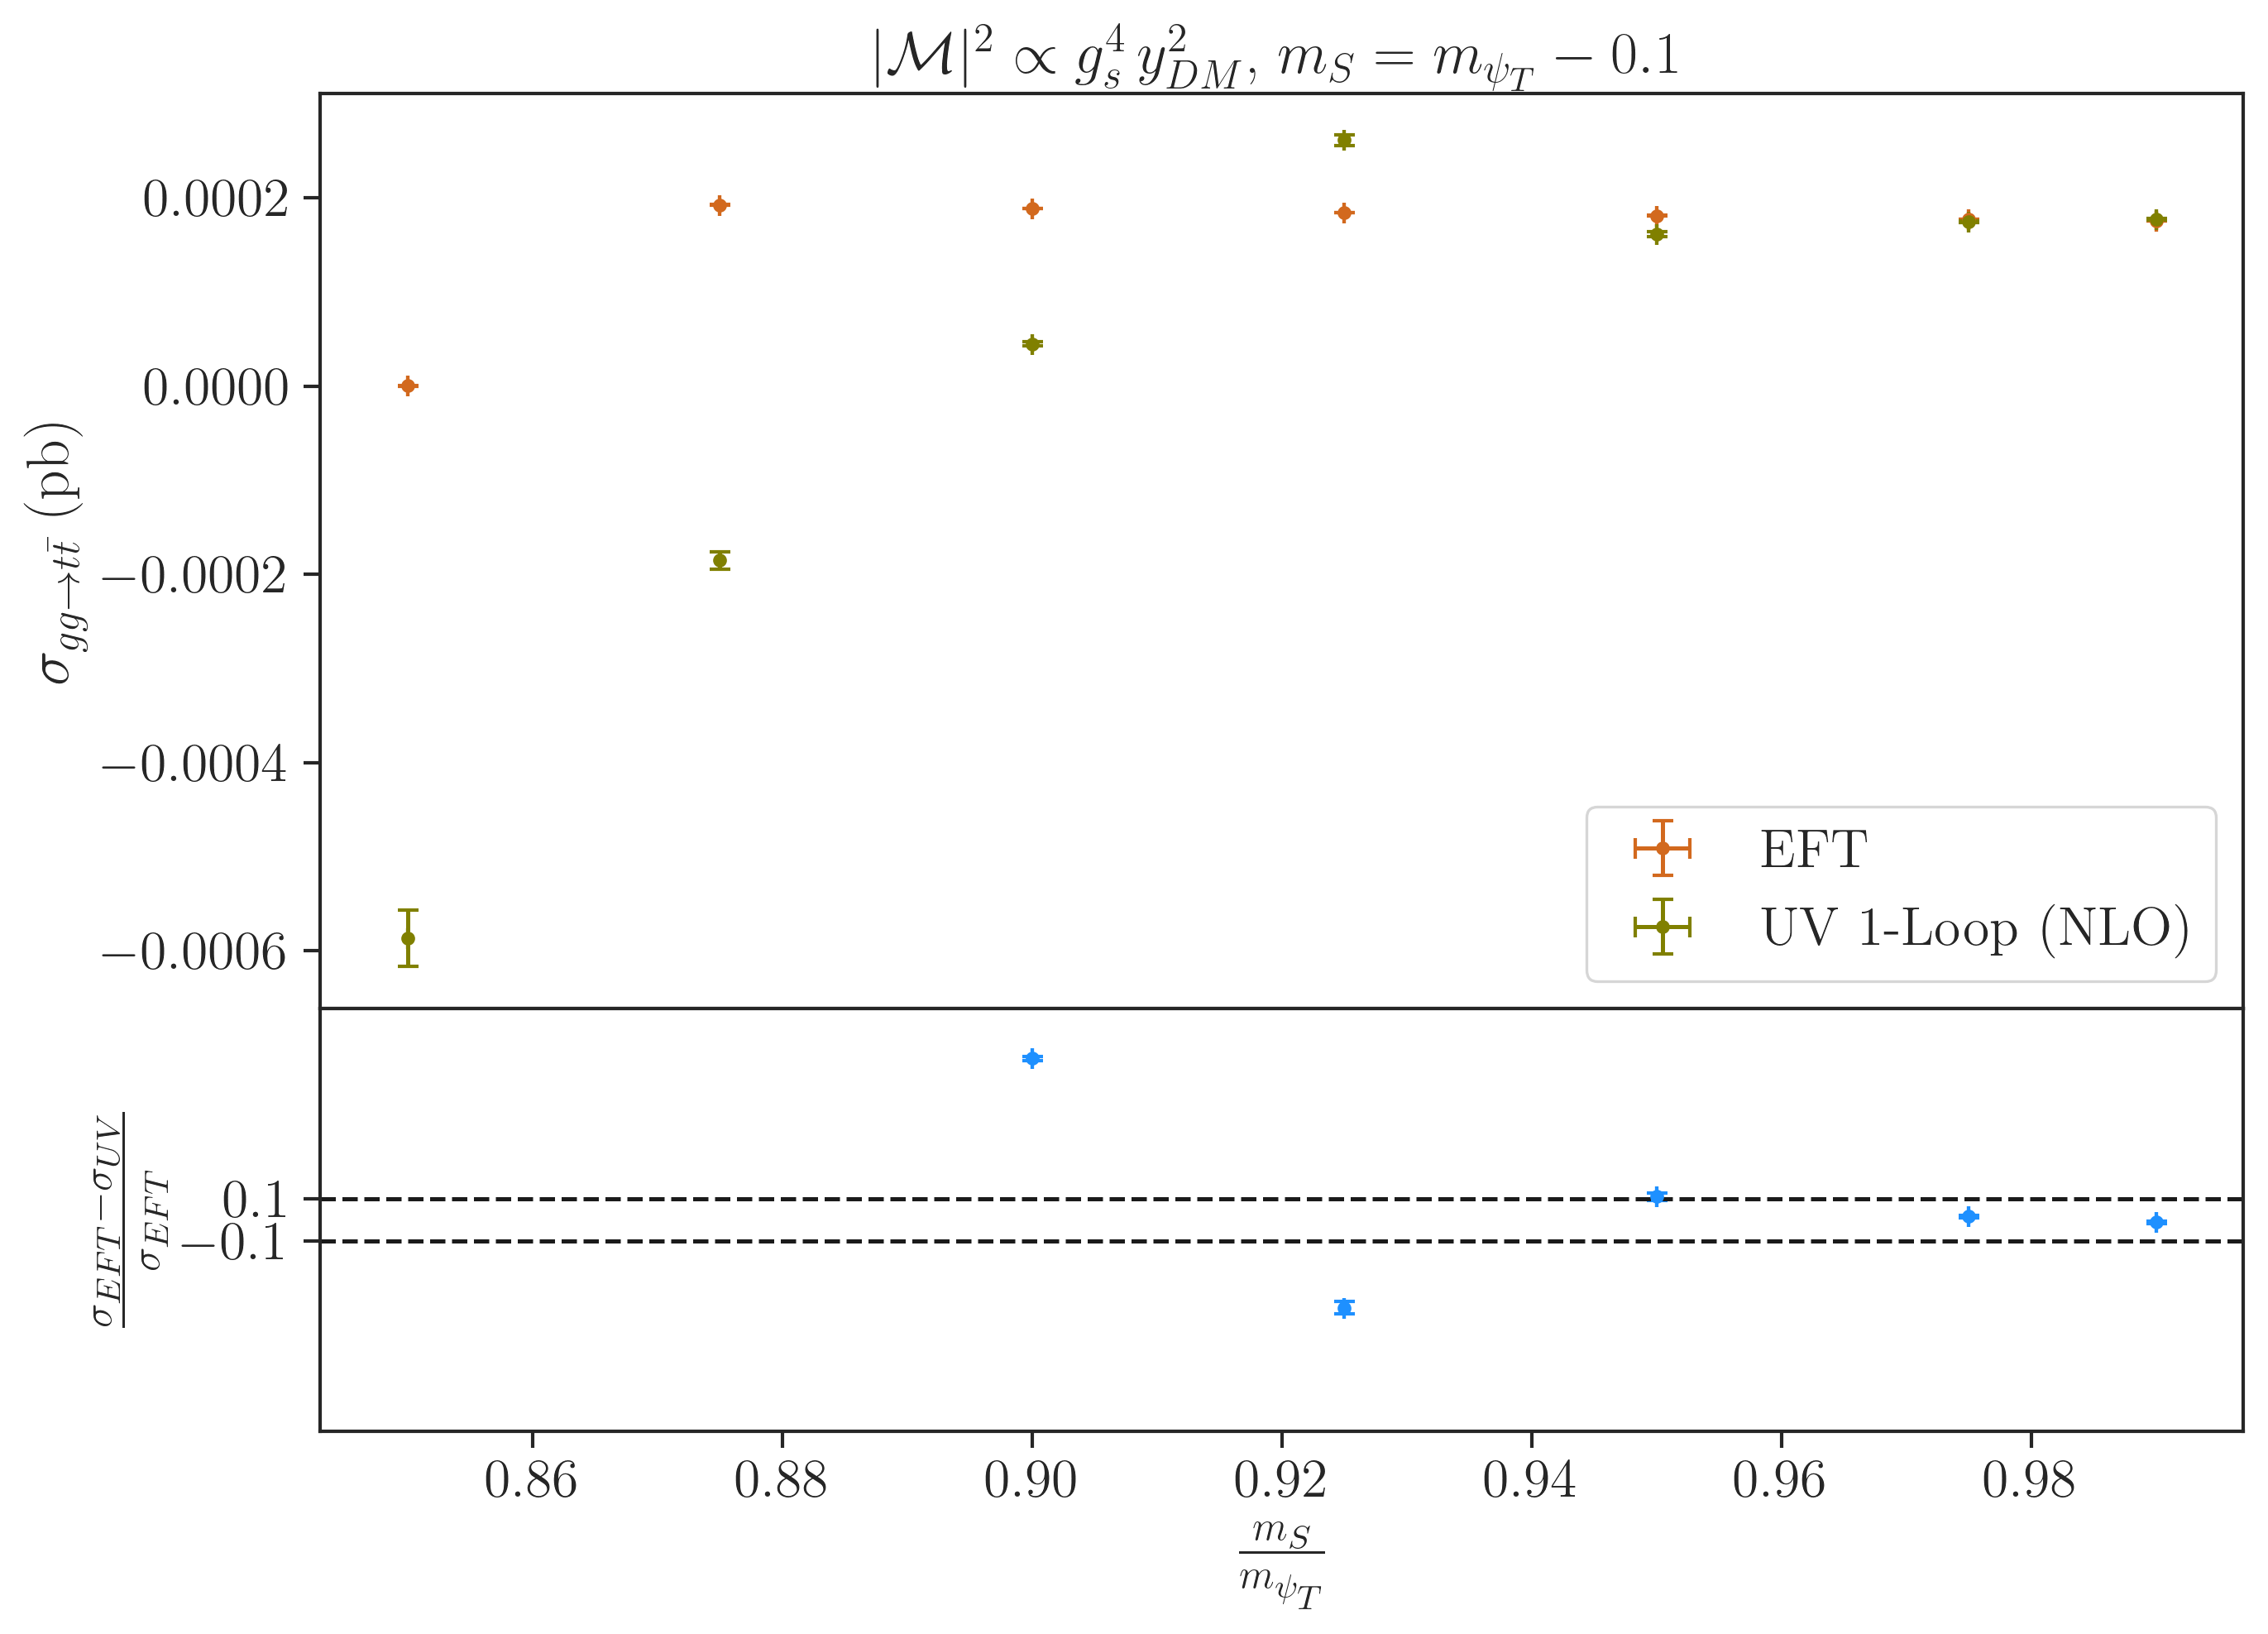

In [51]:
fig = plt.figure(figsize = [10,7], dpi = 300) 
gs = fig.add_gridspec(2,1, hspace=0, height_ratios=[8, 3.7])
axs = gs.subplots(sharex=True)

#Gráfico principal
axs[0].errorbar(m_SDM4/m_psiT4,pts_g1_eft,err_g1_eft, 0, 'o', ms = 3.0, capsize=3, 
                color = 'chocolate', label = 'EFT' )
axs[0].errorbar(m_SDM4/m_psiT4,pts_g1_uv,err_g1_uv,0, 'o', ms = 3.0, capsize=3, 
                color = 'olive', label = 'UV 1-Loop (NLO)' )
axs[0].set_ylabel(r'$\sigma_{gg\to t\bar{t}}$ (pb)')
axs[0].legend()
axs[0].set_title(r'$|\mathcal{M}|^2 \propto g_s^4 \, y_{DM}^2$, $m_S = m_{\psi_T} - 0.1$  ')
#axs[0].set_yscale('log')


#Gráfico de resíduos
diff5 = (pts_g1_eft - pts_g1_uv)/pts_g1_eft
err5 = np.sqrt((err_g1_uv/pts_g1_eft)**2 + (pts_g1_uv/(pts_g1_eft**2)) * err_g1_eft**2)
axs[1] = plt.subplot(gs[1])
axs[1].errorbar(m_SDM4/m_psiT4,diff5,err5,0, 'o', ms = 3.0, capsize=3, 
                color = 'dodgerblue', label = 'EFT - UV 1-Loop' )
axs[1].axhline(y=0.1, color='k', linestyle='--')
axs[1].axhline(y=-0.1, color='k', linestyle='--')
axs[1].set_ylabel(r'$\frac{\sigma_{EFT} - \sigma_{UV}}{\sigma_{EFT}}$')
axs[1].set_yticks([-0.1,  0.1])
axs[1].set_ylim([-1,1])
#axs[1].set_yscale('log')


plt.xlabel(r'$\frac{m_S}{m_{\psi_T}}$')


plt.show()